In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib notebook

In [114]:
# Each trial will be a 60 shot vector, 
stops = np.array([10,20])
X = np.array([[1 if (j in (stops+i)) else 0 for j in range(60)] for i in range(60)])

In [148]:
# reward at step 60
R = np.array([[0] for i in range(60)])
R[59][0] = 1
# Initial weights are 0
W = np.array([[0] for i in range(60)])
# Learning rate
alpha = 0.1
gamma = 0.8

In [149]:
# equation 3 from paper
def error(r, v, gamma):
    # err = np.array([[(r[i][0] + gamma*v[i+1][0] - v[i][0])] for i in range(60)])
    err = []
    for i in range(60):
        r_ = r[i][0]
        if i < 59:
            g_ = gamma*v[i+1][0]
        else:
            g_ = 0
        v_ = v[i][0]
        err.append([r_ + g_ - v_])

    return np.array(err)

In [150]:
# Equation 4
def pred_rewards(x, w):
    return np.dot(x, w)

In [157]:
# Equation 2
def future_rewards(r, gamma):
    prev = 0
    v = []
    for i in range(60):
        v_t = r[59-i][0] + gamma*prev
        v.append(v_t)
        prev = v_t
    v.reverse
#     print(v)
    return np.array(v).reshape(60,1)

In [225]:
pred_err_array = []
for i in range(60):
    V_hat = pred_rewards(X, W)
    V = future_rewards(R, gamma)
    prediction_error = V - V_hat
    pred_err_array.append(prediction_error)
    # print(R.shape, V_hat.shape)
    err = error(R, V_hat, gamma)
    # Equation 5 from paper
    delta_w = alpha*(np.dot(X.T, err))
    # print(delta_w)
    W = W - delta_w

In [226]:
df = pd.DataFrame(np.array(pred_err_array).reshape(60,60))
df=df.unstack().reset_index()
df.columns=["X","Y","Z"]
df

,X,Y,Z
0,0,0,1.000000
1,0,1,1.000000
2,0,2,1.000000
3,0,3,1.000000
4,0,4,1.000000
...,...,...,...
3595,59,55,0.000002
3596,59,56,0.000002
3597,59,57,0.000002
3598,59,58,0.000002


<IPython.core.display.Javascript object>


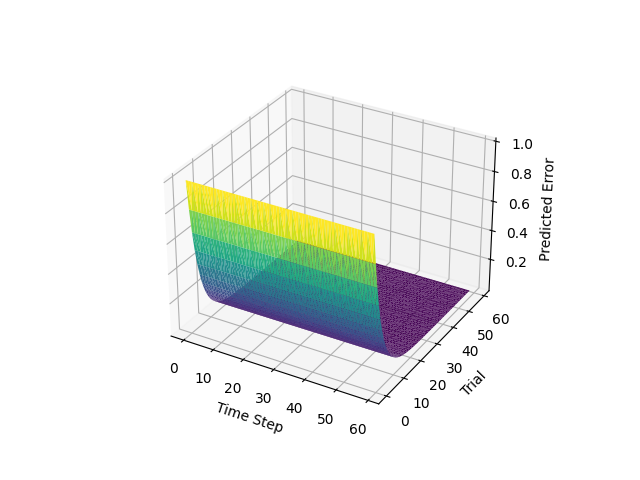

In [227]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel('Time Step')  
ax.set_ylabel('Trial')  
ax.set_zlabel('Predicted Error') 
plt.show()
 
# # to Add a color bar which maps values to colors.
# surf=ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
# fig.colorbar( surf, shrink=0.5, aspect=5)
# plt.show()
 
# # Rotate it
# ax.view_init(30, 45)
# plt.show()
 
# # Other palette
# ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.jet, linewidth=0.01)
# plt.show()

# Ignore stuff below for now - it's for the animation later on

In [172]:
# Creating radii and angles 
r = np.linspace(0.125, 1.0, 100)   
a = np.linspace(0, 2 * np.pi,  
                100, 
                endpoint = False)   
    
# Repeating all angles for every radius   
a = np.repeat(a[..., np.newaxis], 100, axis = 1)   
    
# Creating datset 
x = np.append(0, (r * np.cos(a)))   
y = np.append(0, (r * np.sin(a)))     
z = (np.sin(x ** 4) + np.cos(y ** 4))  
    
# Creating figure 
# fig = plt.figure(figsize =(16, 9))   
ax = plt.axes(projection ='3d')   
  
# Creating color map 
my_cmap = plt.get_cmap('hot') 
    
# Creating plot 
trisurf = ax.plot_trisurf(x, y, z, 
                         cmap = my_cmap, 
                         linewidth = 0.2,  
                         antialiased = True, 
                         edgecolor = 'grey')   
fig.colorbar(trisurf, ax = ax, shrink = 0.5, aspect = 5) 
ax.set_title('Tri-Surface plot') 
  
# Adding labels 
ax.set_xlabel('X-axis', fontweight ='bold')  
ax.set_ylabel('Y-axis', fontweight ='bold')  
ax.set_zlabel('Z-axis', fontweight ='bold') 
      
# show plot 
plt.show() 

## More anim stuf

In [223]:
import matplotlib as mpl
# backend_ =  mpl.get_backend() 
# mpl.use("Agg")  # Prevent showing stuff

# # Your code

mpl.use(backend_) # Reset backend


In [188]:
# library
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 
# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes
 
# We are going to do 20 plots, for 20 different angles
for angle in range(70,210,2):
 
    # Make the plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)

    # Set the angle of the camera
    ax.view_init(30,angle)

    # Save it
    filename='animation/example/Volcano_step'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)
    plt.close()
    # plt.gca()
